<a href="https://colab.research.google.com/github/rodrigocl90/Proyectos-ML/blob/main/Riesgo_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")


# Carga de Datos

In [ ]:
# 🔹 Imprime una etiqueta para indicar que se está cargando un CSV desde una URL pública
print("Carga de datos")

# 🔹 Define la URL del archivo CSV en formato RAW
data_original = "https://raw.githubusercontent.com/rodrigocl90/Proyectos-ML/main/Riesgo%20de%20Cr%C3%A9dito/credit_risk.csv"

data = "https://raw.githubusercontent.com/rodrigocl90/Proyectos-ML/main/Riesgo%20de%20Cr%C3%A9dito/credit_risk.csv"
# 🔹 Carga el CSV usando pandas
data = pd.read_csv(data)

data

Carga de datos


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#Descripción de cada Columna

### Descripción de las Variables

- **person_age**: Edad de la persona que solicita el préstamo.
- **person_income**: Ingreso anual de la persona.
- **person_home_ownership**: Tipo de propiedad de la vivienda de la persona.
  - **rent**: La persona actualmente arrienda una propiedad.
  - **mortgage**: La persona tiene una hipoteca sobre la propiedad que posee.
  - **own**: La persona es propietaria absoluta de su vivienda.
  - **other**: Otras categorías de propiedad que pueden ser específicas del conjunto de datos.
- **person_emp_length**: Años de antigüedad laboral de la persona.
- **loan_intent**: Propósito o motivo de la solicitud del préstamo.
- **loan_grade**: Calificación asignada al préstamo según la solvencia del solicitante.
  - **A**: Alta solvencia, bajo riesgo.
  - **B**: Riesgo relativamente bajo, pero menor solvencia que grado A.
  - **C**: Solvencia moderada.
  - **D**: Riesgo más alto en comparación con los grados anteriores.
  - **E**: Menor solvencia, mayor riesgo.
  - **F**: Riesgo crediticio significativo.
  - **G**: Solvencia más baja, mayor riesgo posible.
- **loan_amnt**: Monto del préstamo solicitado.
- **loan_int_rate**: Tasa de interés asociada al préstamo.
- **loan_status**: Estado del préstamo, donde 0 indica que no hubo incumplimiento (no default) y 1 indica incumplimiento (default).
  - **0**: No incumplimiento – El préstamo fue pagado exitosamente según lo acordado.
  - **1**: Incumplimiento – El préstamo no fue pagado según lo acordado.
- **loan_percent_income**: Porcentaje del ingreso que representa el monto del préstamo.
- **cb_person_default_on_file**: Historial de incumplimientos del individuo según los registros de crédito.
  - **Y**: Tiene historial de incumplimientos.
  - **N**: No tiene historial de incumplimientos.
- **cb_preson_cred_hist_length**: Años de historial crediticio del individuo.


#Análisis de Datos Exploratorio

Vemos las 10 primeras filas

In [ ]:
data.head(10)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


Vemos las 10 últimas filas

In [ ]:
data.tail(10)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


Descripción estadística

In [ ]:
data.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


se pueden observar incoherencia en edad 144 años  y

Vemos información de las columnas

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Contamos los Valores Nulos por columnas

In [ ]:
data.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Vemos los valores únicos por columna

In [ ]:
data.nunique()


,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


Contamos los Valores unicos de nuestra columna objetivo llamada loan_status, 0 indica que no incumple, 1 que incumple

In [ ]:
data.loan_status.value_counts()


,count
loan_status,
0,25473
1,7108


Vemos las filas duplicadas

In [ ]:
data.duplicated().sum()


np.int64(165)

Ver duplicados

In [ ]:
duplicados = data[data.duplicated(keep=False)]
duplicados_ordenados = duplicados.sort_values(by=list(data.columns))
duplicados_ordenados


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


Ver Gráfico de Correlación

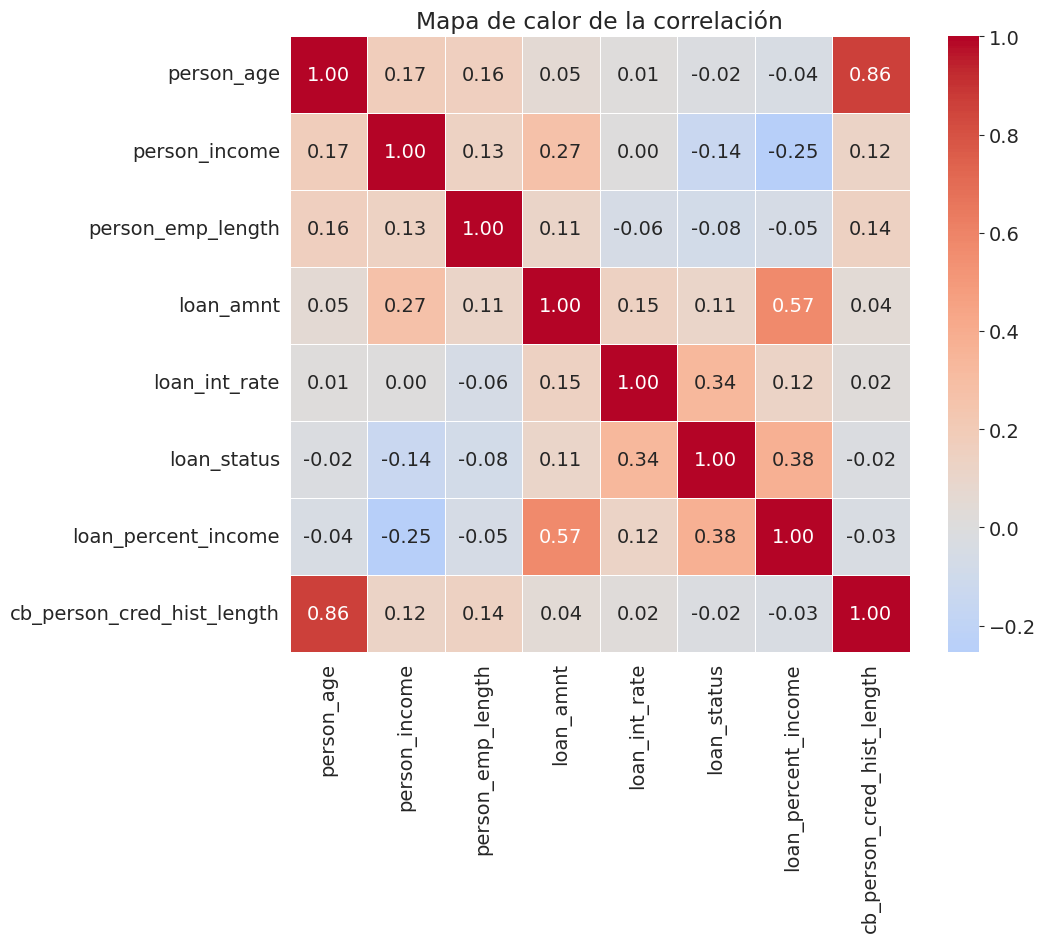

In [ ]:

# Calcular la matriz de correlación solo con columnas numéricas
correlaciones = data.corr(numeric_only=True)

# Crear un mapa de calor con colores
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de la correlación')
plt.show()

Podemes decir que hay una alta correlación entre Años de historial crediticio del individuo y edad, también ingreso anual y *porcentaje* del ingreso que representa el monto del préstamo.

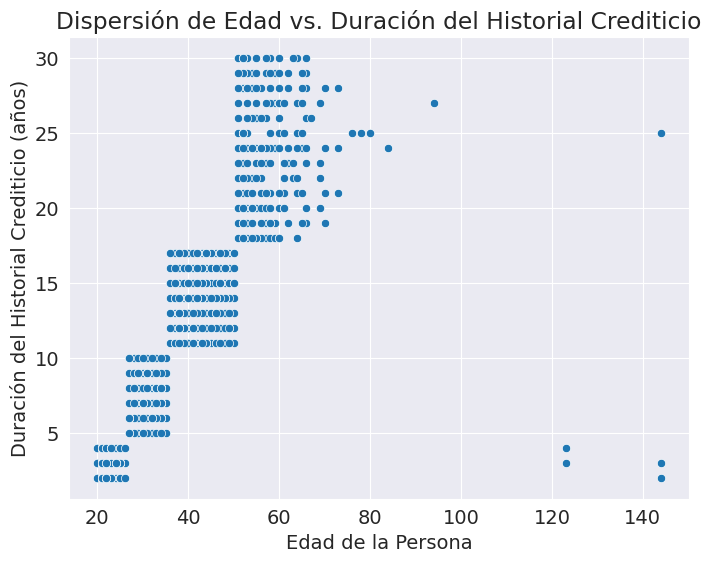

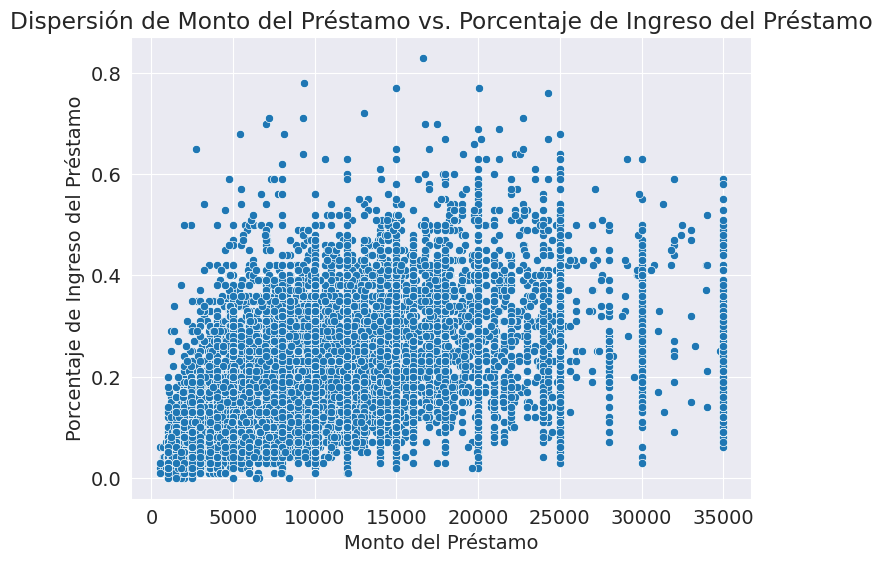

In [ ]:
# 1. person_age and cb_person_cred_hist_length (Correlation: 0.86)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='person_age', y='cb_person_cred_hist_length', data=data) # Changed data=df to data=data
plt.title('Dispersión de Edad vs. Duración del Historial Crediticio')
plt.xlabel('Edad de la Persona')
plt.ylabel('Duración del Historial Crediticio (años)')
plt.grid(True)
plt.show()

# 2. loan_percent_income and loan_amnt (Correlation: 0.57)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amnt', y='loan_percent_income', data=data) # Changed data=df to data=data
plt.title('Dispersión de Monto del Préstamo vs. Porcentaje de Ingreso del Préstamo')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Porcentaje de Ingreso del Préstamo')
plt.grid(True)
plt.show()



Análisis Univariado

Columna Edad

In [ ]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"Máxima edad {max_}")
print(f"Mínima edad {min_}")




Máxima edad 144
Mínima edad 20


In [ ]:
import pandas as pd

# Asegurar que 'person_age' sea numérico
data['person_age'] = pd.to_numeric(data['person_age'], errors='coerce')

# Crear función para clasificar edad
def clasificar_rango(edad):
    if pd.isna(edad) or edad < 0 or edad > 144:
        return 'Edad inválida'
    elif edad >= 100:
        return '95+'
    else:
        inferior = int(edad // 5) * 5
        superior = inferior + 4
        return f"{inferior}-{superior}"

# Aplicar clasificación
data['rango_edad'] = data['person_age'].apply(clasificar_rango)

# Contar personas por grupo
tabla = data['rango_edad'].value_counts().sort_index().reset_index()
tabla.columns = ['Rango de edad', 'Cantidad']

# Mostrar la tabla
print(tabla)


   Rango de edad  Cantidad
0          20-24     12315
1          25-29     11193
2          30-34      4987
3          35-39      2321
4          40-44      1005
5          45-49       420
6          50-54       181
7          55-59        74
8          60-64        41
9          65-69        24
10         70-74        10
11         75-79         2
12         80-84         2
13         90-94         1
14           95+         5


La mayor cantidad de personas se concentra en los rangos de edad entre los 20 y 34 años, hay 5 personas con edad supeior a 95 años que pueden ser un problema

Ingreso Anual por persona

In [ ]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"Ingreso Máximo anual por persona {max_}")
print(f"Ingreso Mínimo anual por persona {min_}")


Ingreso Máximo anual por persona 6000000
Ingreso Mínimo anual por persona 4000


In [ ]:
import pandas as pd

def contar_personas_por_rango(data, columna='person_income'):
    # Elimina nulos y negativos

    # Definir rangos
    rangos = [0, 25000, 50000, 75000, 100000, float('inf')]
    etiquetas = ['0–25K', '25K–50K', '50K–75K', '75K–100K', 'Más de 100K']

    # Crear columna con rangos
    data['rango_ingreso'] = pd.cut(data[columna], bins=rangos, labels=etiquetas, include_lowest=True)

    # Contar personas por rango
    conteo = data['rango_ingreso'].value_counts().sort_index()

    return conteo



conteos = contar_personas_por_rango(data, 'person_income')
print(conteos)


rango_ingreso
0–25K           2469
25K–50K        11613
50K–75K         9622
75K–100K        4670
Más de 100K     4207
Name: count, dtype: int64


(np.float64(-1.0999964776166928),
 np.float64(1.0999986267834283),
 np.float64(-1.0999989559563645),
 np.float64(1.0999998279242433))

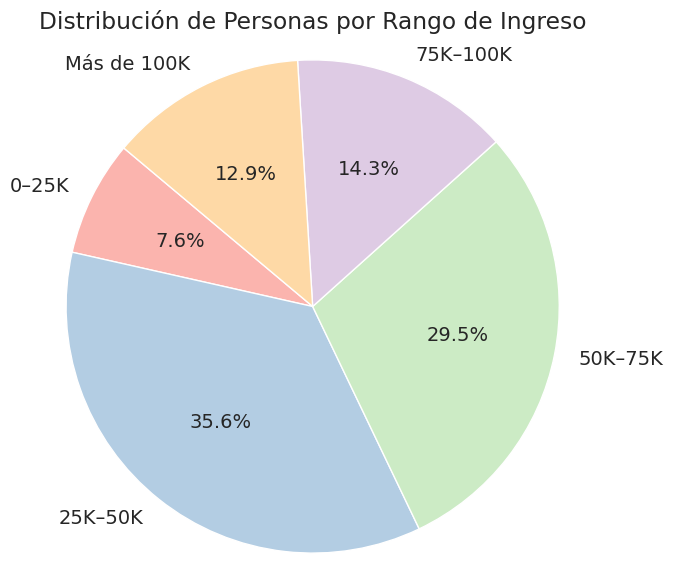

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(
    conteos,
    labels=conteos.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Distribución de Personas por Rango de Ingreso')
plt.axis('equal')  # Hace que el gráfico sea perfectam



Este gráfico circular muestra la "Distribución de Personas por Rango de Ingreso anual". La conclusión principal es que la mayoría de las personas se encuentran en los rangos de ingresos más bajos y medios. Específicamente:

El segmento más grande es el de  25k -  50K, que representa el 35.6% de la población.

Combinando los dos segmentos más grandes (25K -50K y 50K- 75K), se abarca más de la mitad de la población (35.6% + 29.5% = 65.1%).

Los rangos de ingresos más bajos (0-25K) y más altos (Más de 100K) representan proporciones menores de la población (7.6% y 12.9% respectivamente).

En resumen, la distribución de ingresos muestra una concentración significativa en los rangos de 25K a 75K.

**Monto del préstamo solicitado**

In [ ]:

max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"Monto Máximo solicitado {max_loan_amount}")
print(f"Monto Míniimo solicitado {min_loan_amount}")

Monto Máximo solicitado 35000
Monto Míniimo solicitado 500


In [ ]:
import pandas as pd

def contar_prestamos_por_rango(data, columna='loan_amnt'):

    # Definir rangos
    rangos = list(range(0, 35001, 5000))  # [0, 5000, 10000, ..., 35000]
    rangos.append(float('inf'))  # Para incluir valores mayores a 35000
    etiquetas = [f'{rangos[i]}–{rangos[i+1]-1}' for i in range(len(rangos)-2)] + ['Más de 35000']

    # Crear columna con rangos
    data['rango_prestamo'] = pd.cut(data[columna], bins=rangos, labels=etiquetas, include_lowest=True)

    # Contar préstamos por rango
    conteo = data['rango_prestamo'].value_counts().sort_index()

    return conteo

# Uso:
conteos = contar_prestamos_por_rango(data, 'loan_amnt')
print(conteos)


rango_prestamo
0–4999           9489
5000–9999       12040
10000–14999      6123
15000–19999      2789
20000–24999      1689
25000–29999       231
30000–34999       220
Más de 35000        0
Name: count, dtype: int64


In [ ]:
cuenta = data[(data['loan_amnt'] >= 0) & (data['loan_amnt'] > 30000)].shape[0]
print(cuenta)


220


In [ ]:
import pandas as pd
import plotly.express as px

# Convertir a DataFrame
df_conteo = conteos.reset_index()
df_conteo.columns = ['rango', 'cantidad']

# Extraer el número inicial del rango para ordenar
df_conteo['inicio'] = df_conteo['rango'].str.extract(r'(\d+)').astype(float)

# Ordenar por ese número inicial
df_conteo = df_conteo.sort_values('inicio')

# Crear gráfico circular
fig = px.pie(
    names=df_conteo['rango'],
    values=df_conteo['cantidad'],
    title='Distribución de préstamos por rango'
)
fig.show()


### Análisis de la Distribución de Préstamos por Rango

El gráfico de distribución de préstamos por rango muestra una clara concentración en montos específicos:

* **Mayor concentración en préstamos medianos a bajos:**
    * El **37%** de los préstamos se ubican en el rango de **$5000 a $9999**.
    * El **29.1%** de los préstamos corresponden al rango de **$0 a $4999**.
    * En conjunto, estas dos categorías suman el **66.1%** del total de los préstamos, lo que indica que más de dos tercios de los créditos otorgados son de montos pequeños a medianos.

* **Menor proporción en préstamos de alto valor:**
    * Los préstamos de **$10000 a $14999** representan un **18.8%**.
    * Los préstamos de **$15000 a $19999** constituyen un **8.56%**.
    * Los rangos de montos superiores (desde $20000 hasta "Más de $35000") representan porcentajes muy pequeños (que van desde menos del 1% hasta el 5.09%), lo que sugiere que se otorgan muy pocos préstamos por estas cantidades elevadas.

**En resumen:** La distribución de préstamos está fuertemente sesgada hacia montos de tamaño pequeño a mediano, observándose una disminución significativa en el volumen de préstamos de mayor cuantía.

---

Columna De Calificcación asignada al préstamo según la solvencia del solicitante

- **loan_grade**: Calificación asignada al préstamo según la solvencia del solicitante.
  - **A**: Alta solvencia, bajo riesgo.
  - **B**: Riesgo relativamente bajo, pero menor solvencia que grado A.
  - **C**: Solvencia moderada.
  - **D**: Riesgo más alto en comparación con los grados anteriores.
  - **E**: Menor solvencia, mayor riesgo.
  - **F**: Riesgo crediticio significativo.
  - **G**: Solvencia más baja, mayor riesgo posible.

In [ ]:
# Crear tabla de conteo
conteo = data['loan_grade'].value_counts().reset_index()
conteo.columns = ['loan_grade', 'count']

# Mostrar la tabla
print("Tabla de frecuencias por loan_grade:")
print(conteo.to_string(index=False))

# Crear gráfico circular
fig = px.pie(
    conteo,
    names='loan_grade',
    values='count',
    title='Distribución de loan_grade',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0
)

# Añadir etiquetas con porcentaje dentro del gráfico
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()





Tabla de frecuencias por loan_grade:
loan_grade  count
         A  10777
         B  10451
         C   6458
         D   3626
         E    964
         F    241
         G     64


La mayoría de los préstamos se concentran en los grados A y B, que juntos representan el 65.2% del total (33.1% para el grado A y 32.1% para el grado B). El grado C es el siguiente más común con un 19.8%, mientras que los grados D, E, F y G representan porcentajes significativamente menores, lo que sugiere que la institución otorga préstamos en su mayoría a solicitantes con un riesgo de crédito percibido más bajo (grados A y B). Los grados con menor representación son F y G, indicando una proporción muy pequeña de préstamos con mayor riesgo.

Columna person_home_ownership, Tipo de propiedad de la vivienda de la persona

In [ ]:
# Crear tabla de conteo
conteo = data['person_home_ownership'].value_counts().reset_index()
conteo.columns = ['person_home_ownership', 'count']

# Calcular total y porcentaje
total = conteo['count'].sum()
conteo['percentage'] = round((conteo['count'] / total) * 100, 2)

# Mostrar tabla sin índice
print("Tabla de frecuencias por person_home_ownership:")
print(conteo.to_string(index=False))
print(f"\nTotal de registros: {total}")

# Crear gráfico circular
fig = px.pie(
    conteo,
    names='person_home_ownership',
    values='count',
    title='Distribución de person_home_ownership',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0
)

# Añadir etiquetas con porcentaje dentro del gráfico
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()



Tabla de frecuencias por person_home_ownership:
person_home_ownership  count  percentage
                 RENT  16446       50.48
             MORTGAGE  13444       41.26
                  OWN   2584        7.93
                OTHER    107        0.33

Total de registros: 32581


Conclusión principal:
La mayoría de las personas arrienda su vivienda (RENT), representando el 50.48% del total.

Le sigue el grupo que tiene una hipoteca (MORTGAGE) con 41.26%.

Solo un 7.93% son propietarios absolutos (OWN).

Un grupo muy pequeño (0.33%) está clasificado como OTHER, posiblemente formas no convencionales de tenencia.

Interpretación:
Esto sugiere que más del 90% de las personas no son dueñas plenas de su vivienda, lo cual puede reflejar niveles de endeudamiento habitacional o bajo acceso a propiedad total. Esta información es valiosa para entender el perfil financiero o riesgo crediticio de los individuos.

Columna loan_intent: Propósito o motivo de la solicitud del préstamo.



In [ ]:
# Crear tabla de conteo
conteo = data['loan_intent'].value_counts().reset_index()
conteo.columns = ['loan_intent', 'count']

# Calcular total y porcentaje
total = conteo['count'].sum()
conteo['percentage'] = round((conteo['count'] / total) * 100, 2)

# Mostrar tabla sin índice
print("Tabla de frecuencias por person_home_ownership:")
print(conteo.to_string(index=False))
print(f"\nTotal de registros: {total}")

# Crear gráfico circular
fig = px.pie(
    conteo,
    names='loan_intent',
    values='count',
    title='Distribución de person_home_ownership',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hole=0
)

# Añadir etiquetas con porcentaje dentro del gráfico
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

Tabla de frecuencias por person_home_ownership:
      loan_intent  count  percentage
        EDUCATION   6453       19.81
          MEDICAL   6071       18.63
          VENTURE   5719       17.55
         PERSONAL   5521       16.95
DEBTCONSOLIDATION   5212       16.00
  HOMEIMPROVEMENT   3605       11.06

Total de registros: 32581


### Conclusión del Análisis de la Distribución de Propósitos de Préstamos (`Loan Intent`)

La intención de préstamo está distribuida de manera casi igualitaria.

El análisis de los propósitos de los préstamos ("loan intent") revela que **Educación y Salud** son las principales motivaciones para solicitar préstamos, cada una representando casi una quinta parte del total (**19.81%** y **18.63%** respectivamente).

Les siguen de cerca los préstamos para **Emprendimientos (Venture), Personales y Consolidación de Deuda**, que tienen una distribución muy similar, rondando el **16-17%** cada uno.

Finalmente, los préstamos para **Mejoras del Hogar** son los menos solicitados, constituyendo solo el **11.86%** de las solicitudes.

En síntesis, la demanda de préstamos se concentra fuertemente en **necesidades esenciales como educación y salud**, seguidas por la gestión financiera personal y el apoyo a iniciativas empresariales.

Columna cb_person_cred_hist_length

 Historial Años de historial crediticio del individuo.

In [ ]:
# Conteo y orden
conteo = data['cb_person_cred_hist_length'].value_counts().reset_index()
conteo.columns = ['cb_person_cred_hist_length', 'conteo']
conteo = conteo.sort_values(by='cb_person_cred_hist_length').reset_index(drop=True)
conteo

,cb_person_cred_hist_length,conteo
0,2,5965
1,3,5943
2,4,5925
3,5,1881
4,6,1857
5,7,1901
6,8,1902
7,9,1895
8,10,1850
9,11,463


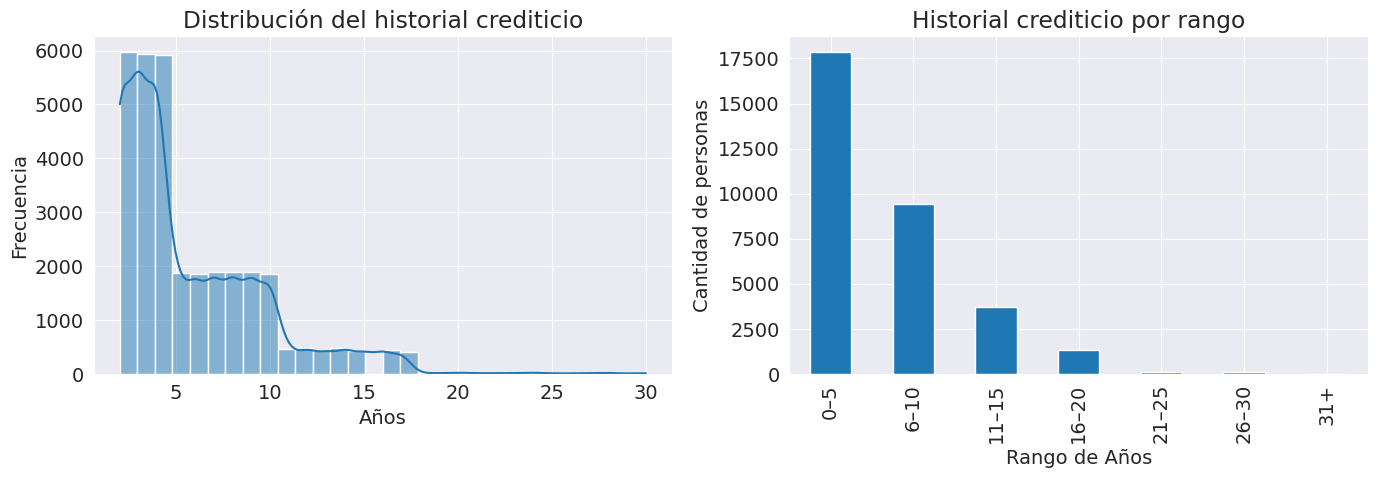

In [ ]:
# Bins y etiquetas
bins = [0, 5, 10, 15, 20, 25, 30, data['cb_person_cred_hist_length'].max() + 1]
labels = ['0–5', '6–10', '11–15', '16–20', '21–25', '26–30', '31+']

# Rango categórico
data['hist_range'] = pd.cut(
    data['cb_person_cred_hist_length'],
    bins=bins,
    labels=labels,
    right=False  # para que 5 quede dentro de 0–5, etc.
)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma con KDE
sns.histplot(data['cb_person_cred_hist_length'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución del historial crediticio')
axes[0].set_xlabel('Años')
axes[0].set_ylabel('Frecuencia')

# Barras por rango
data['hist_range'].value_counts(sort=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('Historial crediticio por rango')
axes[1].set_xlabel('Rango de Años')
axes[1].set_ylabel('Cantidad de personas')

plt.tight_layout()
plt.show()

Predominio de historiales jóvenes (0-5 años): El gráfico de barras y el de distribución muestran que el segmento más numeroso de la población son aquellos con un historial crediticio de entre 0 y 5 años. Esto sugiere que una gran parte de los individuos evaluados son relativamente nuevos en el sistema de crédito formal o han comenzado a construir su historial en los últimos cinco años.

Fuerte concentración hasta los 10 años: Al considerar el rango de 6 a 10 años, este segmento también representa una porción significativa de la población. La suma de individuos en los rangos de 0-5 años (casi 20,000) y 6-10 años (aproximadamente 9,000-10,000) agrupa a la inmensa mayoría de la población. Esto es fundamental, ya que indica que la experiencia crediticia de la mayor parte de los individuos no supera la década.

Disminución drástica en historiales más largos: A partir de los 10 años de antigüedad, la cantidad de personas con un historial crediticio más extenso disminuye exponencialmente. Los rangos de 11-15 años, 16-20 años, y más allá, tienen una representación mínima, lo que significa que es raro encontrar individuos con historiales de crédito muy prolongados en este conjunto de datos.

#Analisis Multivariable


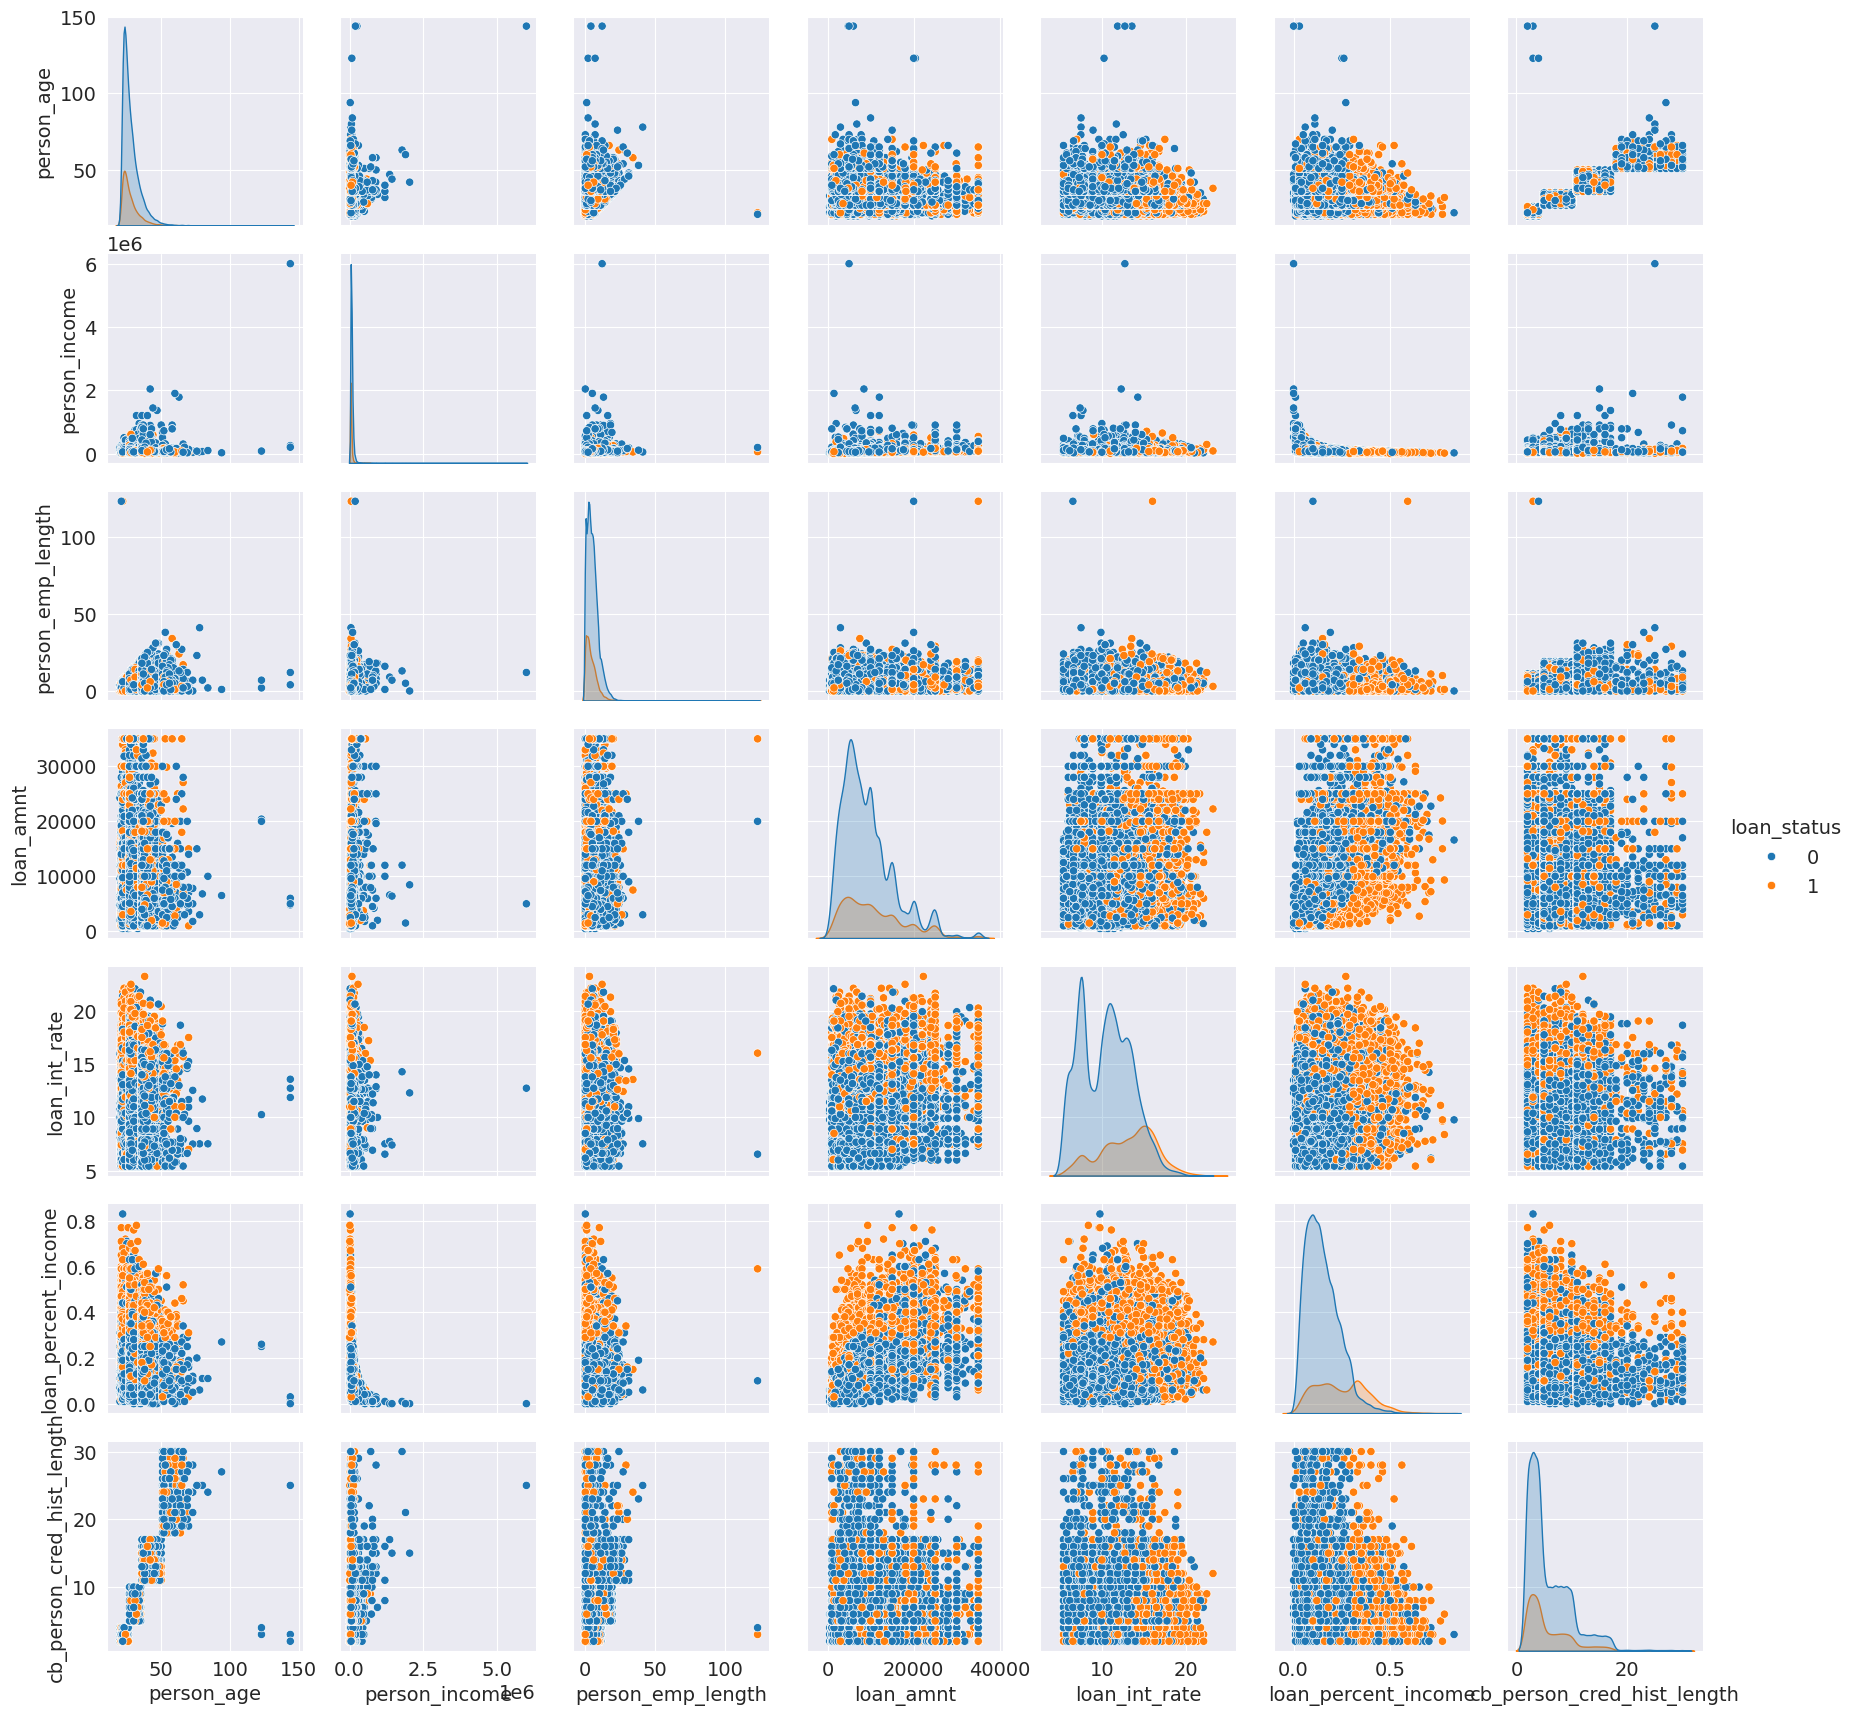

In [ ]:
sns.pairplot(data,hue="loan_status")


#Tratamiento de valores atípicos

In [ ]:
data.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Ver Valores Únicos

Eliminar Valores Nulos

In [ ]:
data.dropna(axis=0,inplace=True)


In [ ]:
data.nunique()


,0
person_age,57
person_income,3835
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,728
loan_int_rate,348
loan_status,2
loan_percent_income,77


Cantidad de Valores Objetivos(Cumplimiento)

In [ ]:
data.loan_status.value_counts()


,count
loan_status,
0,22435
1,6203


In [ ]:
#person_age (edad de la persona) tiene un máximo de 144 (problema)
#person_emp_length (antigüedad laboral de la persona) tiene un máximo de 123 (problema)
data.reset_index(inplace = True)  # restablecer el índice del DataFrame (modifica el DataFrame original)


<BarContainer object of 57 artists>

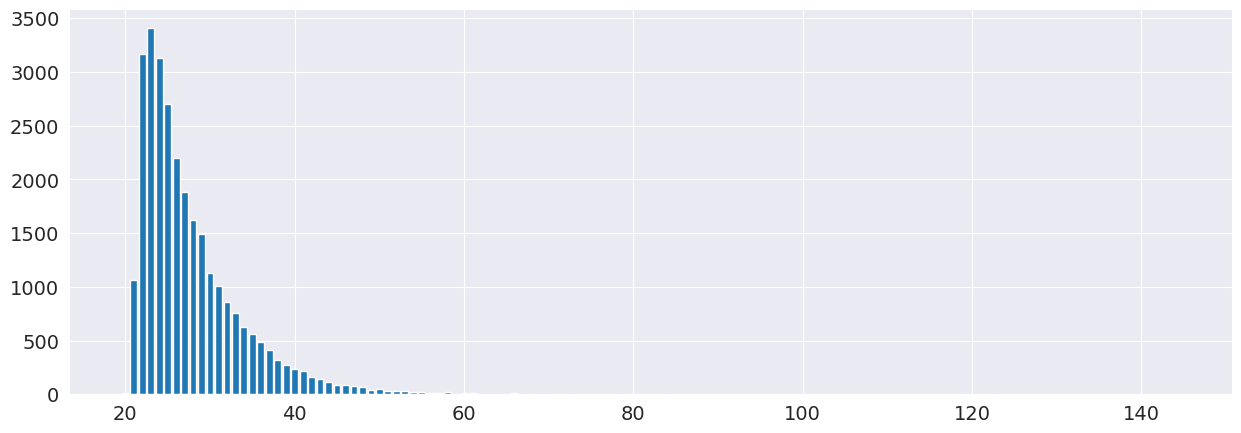

In [ ]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [ ]:
(data['person_age'].value_counts().values > 90).sum()
#Ver cuantos años de edad superan 90 apariciones


np.int64(25)

Ingeniería de Características

eliminar edad sobre 80 años

In [ ]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

Crear columna Age_group, para agrupar por edad

In [ ]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [ ]:
data[data['person_age'] == 80].iloc[0]


,28498
index,32422
person_age,80
person_income,64000
person_home_ownership,RENT
person_emp_length,7.0
loan_intent,MEDICAL
loan_grade,B
loan_amnt,6800
loan_int_rate,11.71
loan_status,0
